# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | sogndal
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | benghazi
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | nagqu
Processing Record 10 of Set 1 | lijiang
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | sarkand
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | jonuta
Processing Record 21 of Set 1 | manokwari
Processing Record 22 of Set 1 | ayancik
Processing Record 23 of Set 

Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | mugia
Processing Record 41 of Set 4 | pucon
Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | hirara
Processing Record 44 of Set 4 | nikolayevsk-on-amure
Processing Record 45 of Set 4 | aptos
Processing Record 46 of Set 4 | shentala
Processing Record 47 of Set 4 | izluchinsk
Processing Record 48 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 49 of Set 4 | ujae
Processing Record 0 of Set 5 | kone
Processing Record 1 of Set 5 | karungdong
Processing Record 2 of Set 5 | taguatinga
Processing Record 3 of Set 5 | riosucio
Processing Record 4 of Set 5 | badger
Processing Record 5 of Set 5 | uturoa
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | omdurman
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | whitehorse
Processing Record 10 of Set 5 | saudarkrokur
Processing Record 11 of Set 5 | prado
Processing Record 12 of S

Processing Record 27 of Set 8 | quellon
Processing Record 28 of Set 8 | vikulovo
Processing Record 29 of Set 8 | roanoke
Processing Record 30 of Set 8 | labrador city
Processing Record 31 of Set 8 | luau
Processing Record 32 of Set 8 | san martin
Processing Record 33 of Set 8 | kyzyl-suu
Processing Record 34 of Set 8 | valparaiso
Processing Record 35 of Set 8 | gorur
Processing Record 36 of Set 8 | gubkinskiy
Processing Record 37 of Set 8 | new providence
Processing Record 38 of Set 8 | humaita
Processing Record 39 of Set 8 | mailsi
Processing Record 40 of Set 8 | changli
Processing Record 41 of Set 8 | mejit
Processing Record 42 of Set 8 | pariaman
Processing Record 43 of Set 8 | afaahiti
Processing Record 44 of Set 8 | as sulayyil
Processing Record 45 of Set 8 | galveston
Processing Record 46 of Set 8 | sodankyla
Processing Record 47 of Set 8 | smyrna
Processing Record 48 of Set 8 | okhotsk
Processing Record 49 of Set 8 | moree
Processing Record 0 of Set 9 | changleng
Processing Reco

Processing Record 18 of Set 12 | kuanda
Processing Record 19 of Set 12 | mount isa
Processing Record 20 of Set 12 | tolanaro
Processing Record 21 of Set 12 | phongsali
Processing Record 22 of Set 12 | howrah
Processing Record 23 of Set 12 | ganta
Processing Record 24 of Set 12 | banswara
Processing Record 25 of Set 12 | vacaria
Processing Record 26 of Set 12 | annaba
Processing Record 27 of Set 12 | guatire
Processing Record 28 of Set 12 | bikenibeu village
Processing Record 29 of Set 12 | dali
Processing Record 30 of Set 12 | taco pozo
Processing Record 31 of Set 12 | yung shue wan
Processing Record 32 of Set 12 | kamina
Processing Record 33 of Set 12 | mariental
Processing Record 34 of Set 12 | paoua
Processing Record 35 of Set 12 | antofagasta
Processing Record 36 of Set 12 | masterton
Processing Record 37 of Set 12 | binuangan
Processing Record 38 of Set 12 | codrington
Processing Record 39 of Set 12 | punakha
Processing Record 40 of Set 12 | maksatikha
Processing Record 41 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,57.11,49,82,3.27,RU,1690506654
1,udachny,66.4167,112.4000,71.46,40,100,5.26,RU,1690506655
2,sogndal,61.2283,7.1003,55.78,100,100,0.00,NO,1690506655
3,ushuaia,-54.8000,-68.3000,31.66,55,0,5.75,AR,1690506656
4,invercargill,-46.4000,168.3500,49.01,78,97,7.00,NZ,1690506656


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,57.11,49,82,3.27,RU,1690506654
1,udachny,66.4167,112.4000,71.46,40,100,5.26,RU,1690506655
2,sogndal,61.2283,7.1003,55.78,100,100,0.00,NO,1690506655
3,ushuaia,-54.8000,-68.3000,31.66,55,0,5.75,AR,1690506656
4,invercargill,-46.4000,168.3500,49.01,78,97,7.00,NZ,1690506656


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

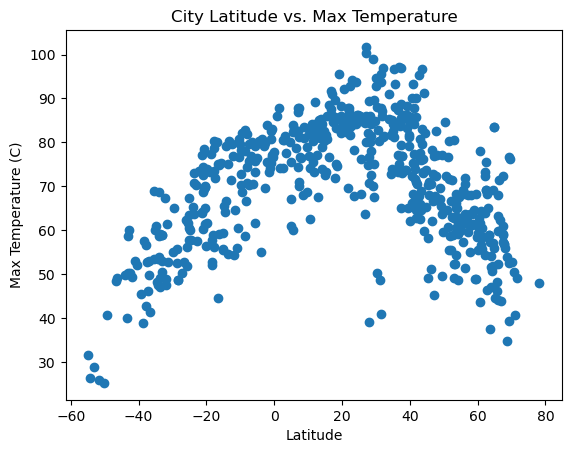

In [13]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temperature = city_data_df['Max Temp']

plt.scatter(latitude, max_temperature)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

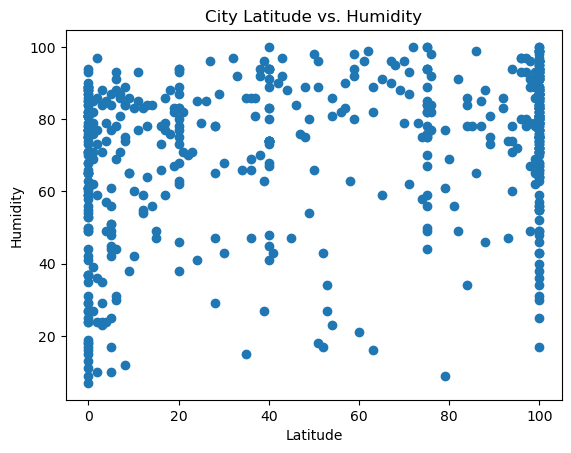

In [16]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(latitude, humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

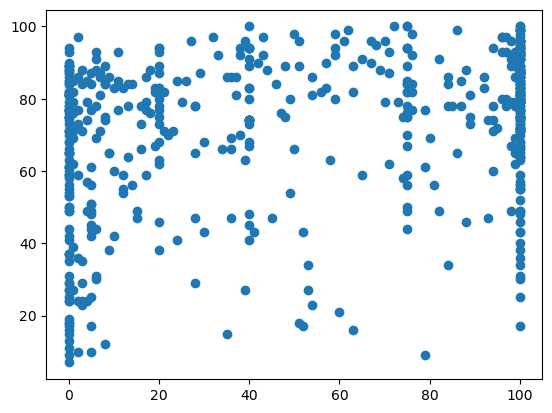

In [15]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = latitude = city_data_df['Cloudiness']

plt.scatter(latitude, humidity)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

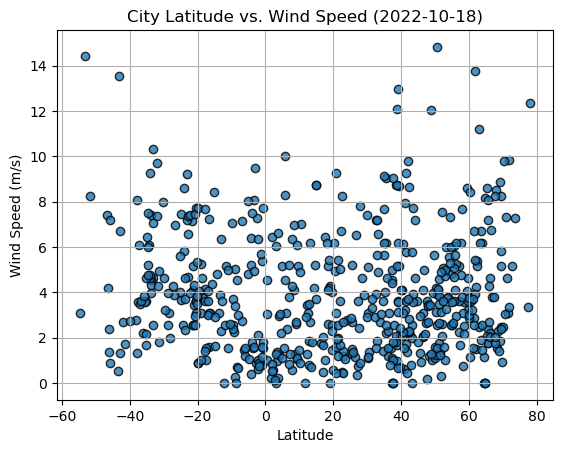

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


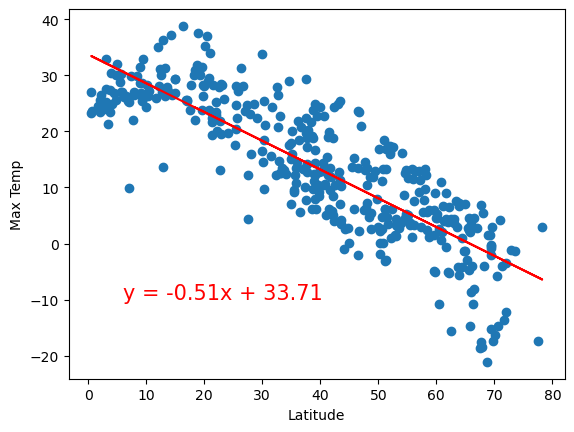

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


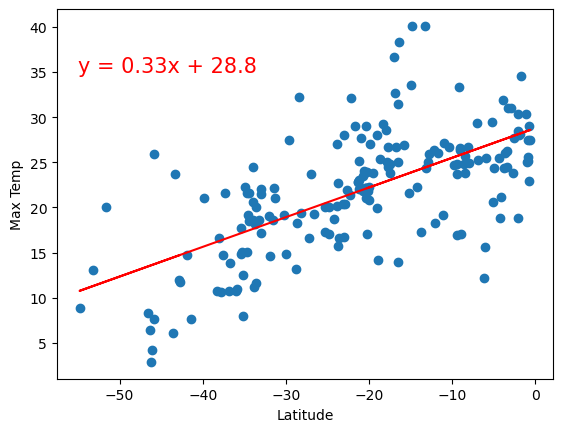

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


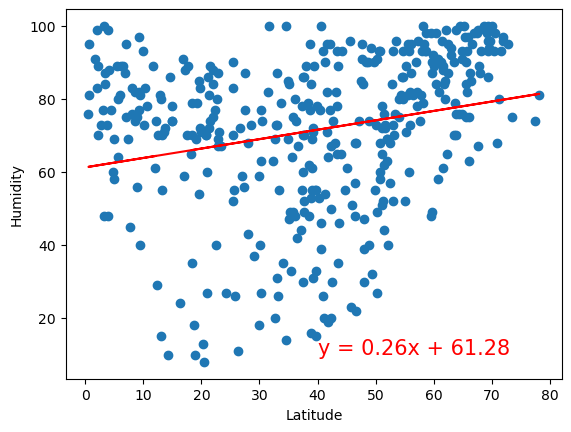

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


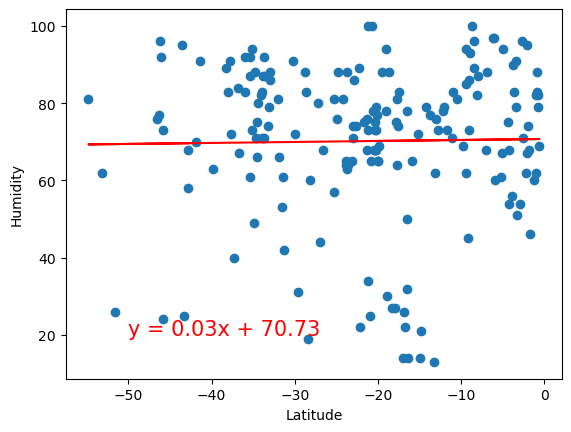

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


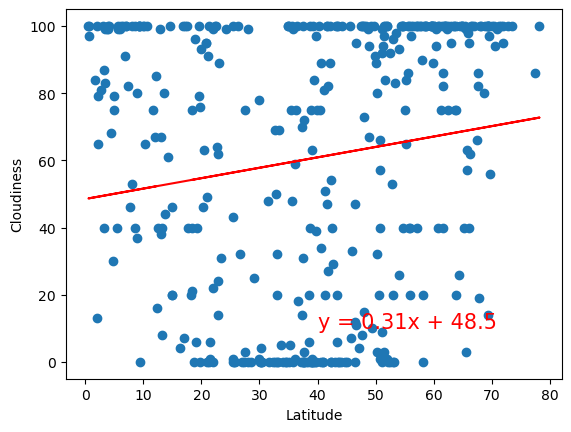

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


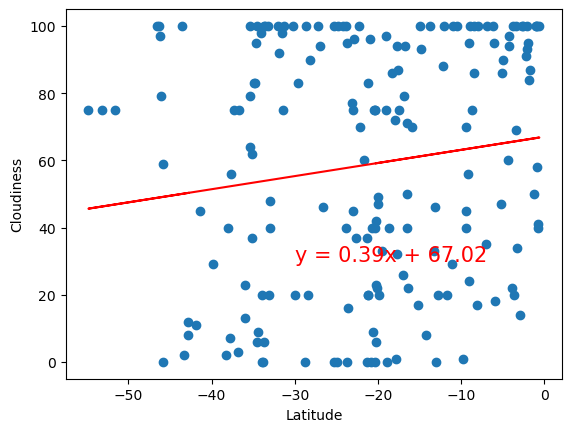

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


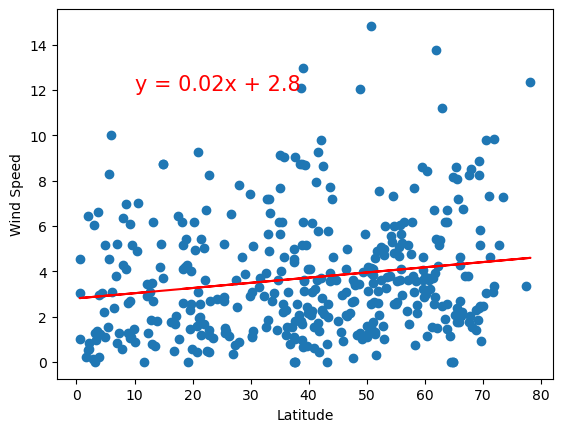

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


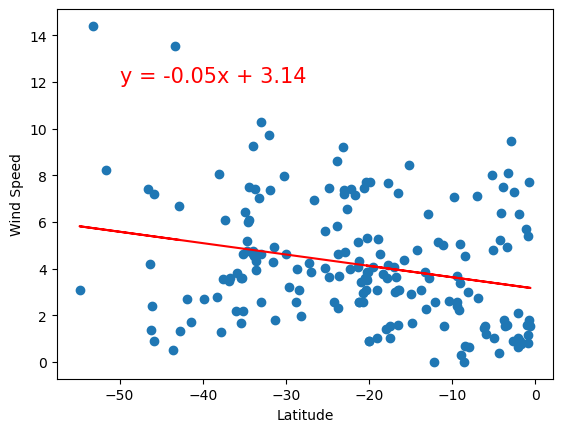

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE